In [29]:
import qcodes as qc
import numpy as np

import transitions
from importlib import reload
reload(transitions )
from transitions import *

In [2]:
data = qc.load_data('CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19')
# data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

DataSet:
   location = 'CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFR_set  | DFR          | (3,)
   Setpoint | DC_control_DFL_set  | DFL          | (3, 3)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (3, 3, 301)
   Setpoint | DC_control_TGAC_set | TGAC         | (3, 3, 301, 251)
   Measured | DC_voltage          | DC_voltage   | (3, 3, 301, 251)

In [5]:
# importing data
DB = data.DBL_DBR_set[1,1,:]
TGAC = data.DC_control_TGAC_set[1,1,1,:]
DC_voltage = data.DC_voltage[0,2,:,:] #change these values for different datasets
DC_voltage = np.swapaxes(DC_voltage,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

DB = DB[150:300]
TGAC = TGAC[0:125]
DC_voltage = DC_voltage[0:125,150:300]



# DB = data.DBL_DBR_set[1,1,:]
# TG = data.DC_control_TGAC_set[1,1,1,:]
# Z = data.DC_voltage[0,1,:,:] #change these values for different datasets
# Z = np.swapaxes(Z,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

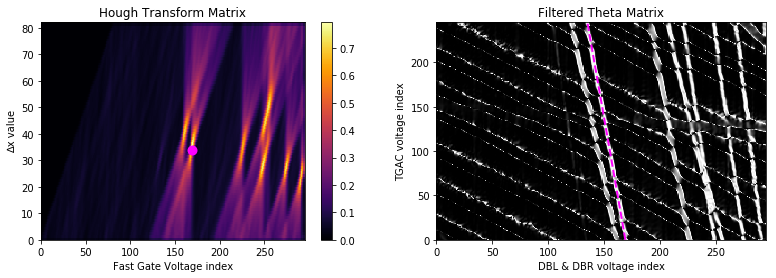

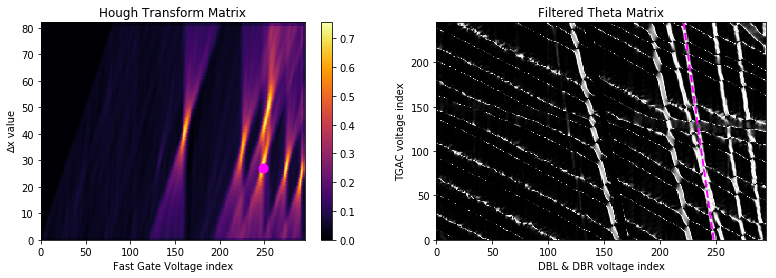

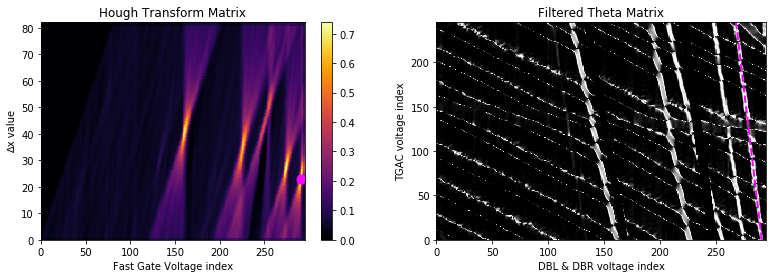

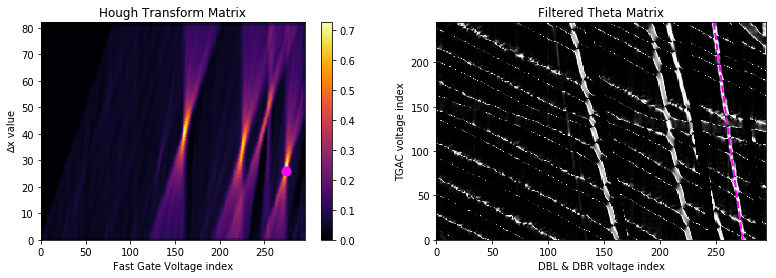

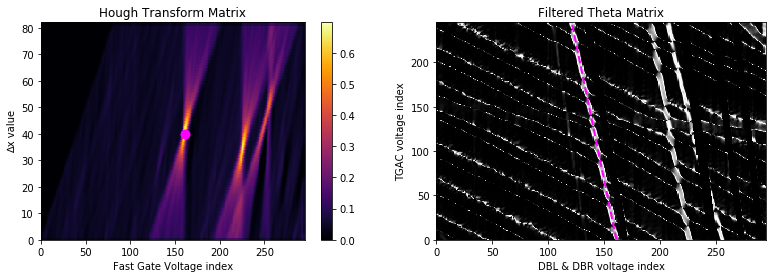

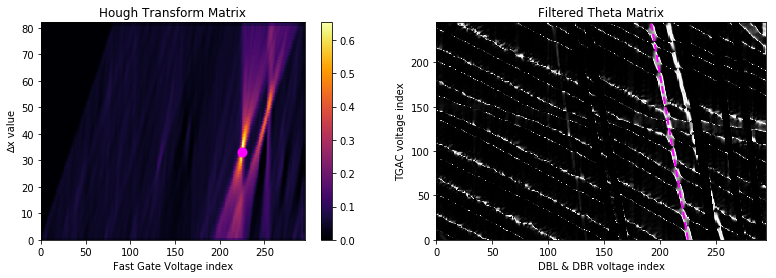

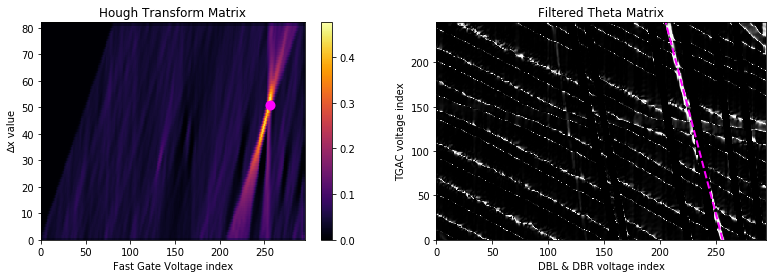

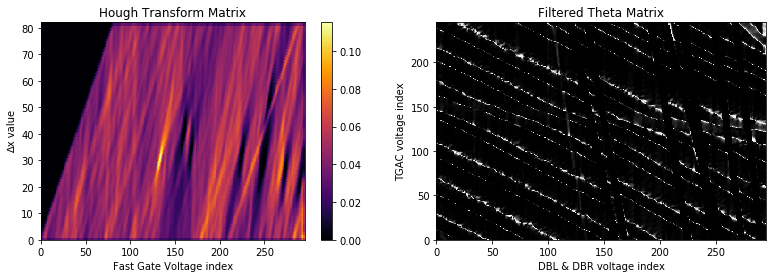

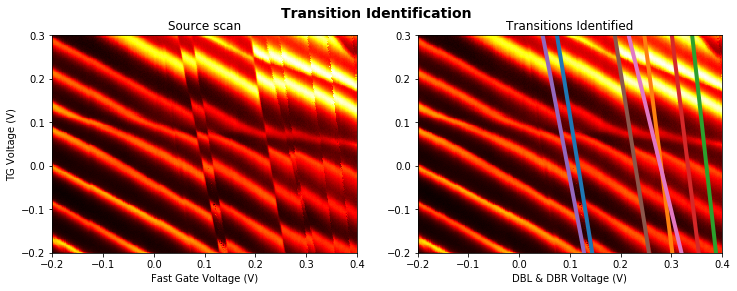

[{'gradient': -7.2058823529411766,
  'gradient_error': 2.9437229437229426,
  'intensity': 0.79344037493252118,
  'location': 0.14399999999999999},
 {'gradient': -9.0740740740740744,
  'gradient_error': 3.7087912087912125,
  'intensity': 0.75578093055533191,
  'location': 0.30199999999999999},
 {'gradient': -10.652173913043478,
  'gradient_error': 4.356060606060602,
  'intensity': 0.73843828304302273,
  'location': 0.38800000000000001},
 {'gradient': -9.4230769230769234,
  'gradient_error': 3.8518518518518565,
  'intensity': 0.72470332109314306,
  'location': 0.35399999999999998},
 {'gradient': -6.125,
  'gradient_error': 2.5015634771732298,
  'intensity': 0.69798596997860285,
  'location': 0.128},
 {'gradient': -7.4242424242424239,
  'gradient_error': 3.0330882352941178,
  'intensity': 0.6530740008011191,
  'location': 0.25600000000000001},
 {'gradient': -4.8039215686274508,
  'gradient_error': 1.9615384615384646,
  'intensity': 0.47609573972583757,
  'location': 0.32000000000000001}]

In [30]:
# from transitions import*
# DB = DBL_DBR gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC]
transitions = find_transitions(DB,TGAC,DC_voltage,plot='Complex')
display(transitions)